# Estudio de datos sobre los delitos en Nueva York

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import dash
import dash_core_components as dcc
import dash_html_components as html
#from jupyter_dash import JupyterDash
import plotly.express as px

import matplotlib.pyplot as plot
from pandas.plotting import parallel_coordinates
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint
import collections
import pydotplus
from IPython.display import Image

import graphviz

### Carga y analisis de datos

In [2]:
df = pd.read_csv ('https://data.cityofnewyork.us/resource/qgea-i56i.csv')

In [3]:
df.columns

Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex'],
      dtype='object')

In [4]:
df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
0,700381962,2015-05-28T00:00:00.000,15:00:00,NaN,NaN,46,2015-06-01T00:00:00.000,578,HARRASSMENT 2,638.0,...,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
1,642234217,2013-10-28T00:00:00.000,13:50:00,2013-10-28T00:00:00.000,13:50:00,120,2013-10-28T00:00:00.000,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.627061,-74.077149,"(40.627060894, -74.077149232)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
2,242465164,2012-05-09T00:00:00.000,20:50:00,2012-05-09T00:00:00.000,21:00:00,24,2012-05-09T00:00:00.000,236,DANGEROUS WEAPONS,782.0,...,NaN,NaN,40.800966,-73.969047,"(40.800965968, -73.969047272)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
3,927207428,2014-01-03T00:00:00.000,13:30:00,2014-01-03T00:00:00.000,13:35:00,108,2014-01-03T00:00:00.000,109,GRAND LARCENY,409.0,...,M,NaN,40.745242,-73.894253,"(40.745241809, -73.894253382)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,2016-04-13T00:00:00.000,00:00:00,NaN,NaN,40,2016-04-13T00:00:00.000,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E


### Filtrado de datos innecesarios

In [5]:
df.drop("addr_pct_cd", axis=1, inplace=True)
df.drop("crm_atpt_cptd_cd", axis=1, inplace=True)
df.drop("juris_desc", axis=1, inplace=True)
df.drop("loc_of_occur_desc", axis=1, inplace=True)
df.drop("parks_nm", axis=1, inplace=True)
df.drop("rpt_dt", axis=1, inplace=True)
df.drop("transit_district", axis=1, inplace=True)

## Heatmap de correlacion entre variables numericas

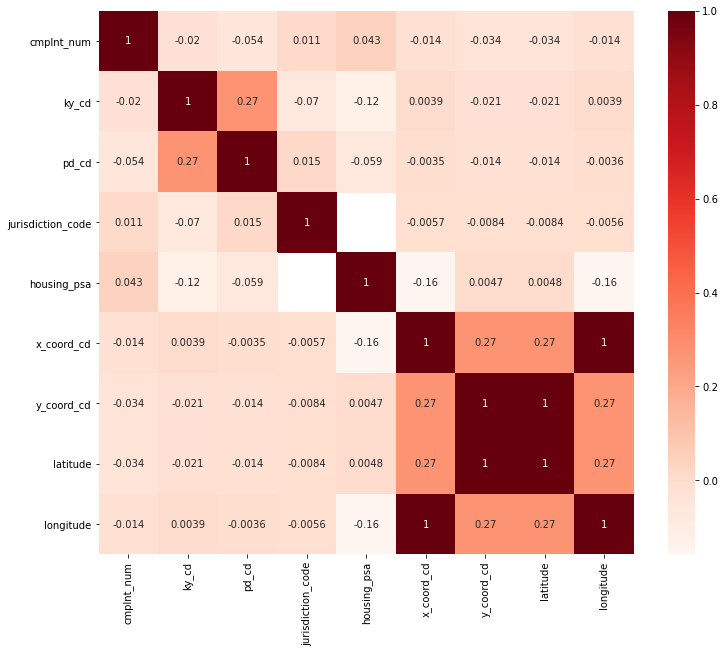

In [6]:
plt.figure(figsize=(12,10))

cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Clasificación supervisada
### Árboles de decisión

In [7]:
X = ['law_cat_cd', 'cmplnt_to_dt', 'susp_age_group', 'susp_race', 'susp_sex', 'boro_nm', 'vic_race', 'vic_age_group', 
     'vic_sex']

Seleccion de variables a usar

In [8]:
data = pd.get_dummies(df[X],drop_first=True)
np.isnan(data) 
np.where(np.isnan(data)) 
np.nan_to_num(data)

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

Creación de conjunto de datos a entrenar

In [9]:
label = pd.get_dummies(df['susp_age_group'],drop_first=True)
np.isnan(label) 
np.where(np.isnan(label)) 
np.nan_to_num(label)

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

Creación de labels a usar, para nuestro caso hemos decidido usar el rango de edad del sospechoso como objetivo de nuestro estudio en la clasificación supervisada.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

Creación de los conjuntos de entrenamiento y test

### Visualización de las características más importantes

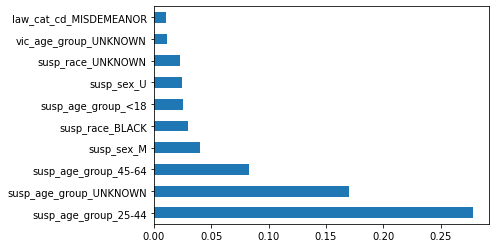

In [11]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
feat_importances = pd.Series(clf.feature_importances_,index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Estudio de los valores de profundidad

In [12]:
new_columns = list(feat_importances.nlargest(10).keys())
X_train_new = X_train[new_columns]

depth = []
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i,criterion='entropy',
                                            min_samples_leaf=5)
    scores = cross_val_score(estimator=clf, X=X_train_new, y=y_train, cv=7)
    depth.append((i,scores.mean()))
print(depth)

[(1, 0.8549852893102321), (2, 0.9462351531001417), (3, 0.9824888307725835), (4, 0.9962406015037593), (5, 0.9962406015037593), (6, 0.9962406015037593), (7, 0.9962406015037593), (8, 0.9962406015037593), (9, 0.9962406015037593), (10, 0.9962406015037593), (11, 0.9962406015037593), (12, 0.9962406015037593), (13, 0.9962406015037593), (14, 0.9962406015037593), (15, 0.9962406015037593), (16, 0.9962406015037593), (17, 0.9962406015037593), (18, 0.9962406015037593), (19, 0.9962406015037593)]


### Creación del árbol de decisión para nuestro caso de estudio

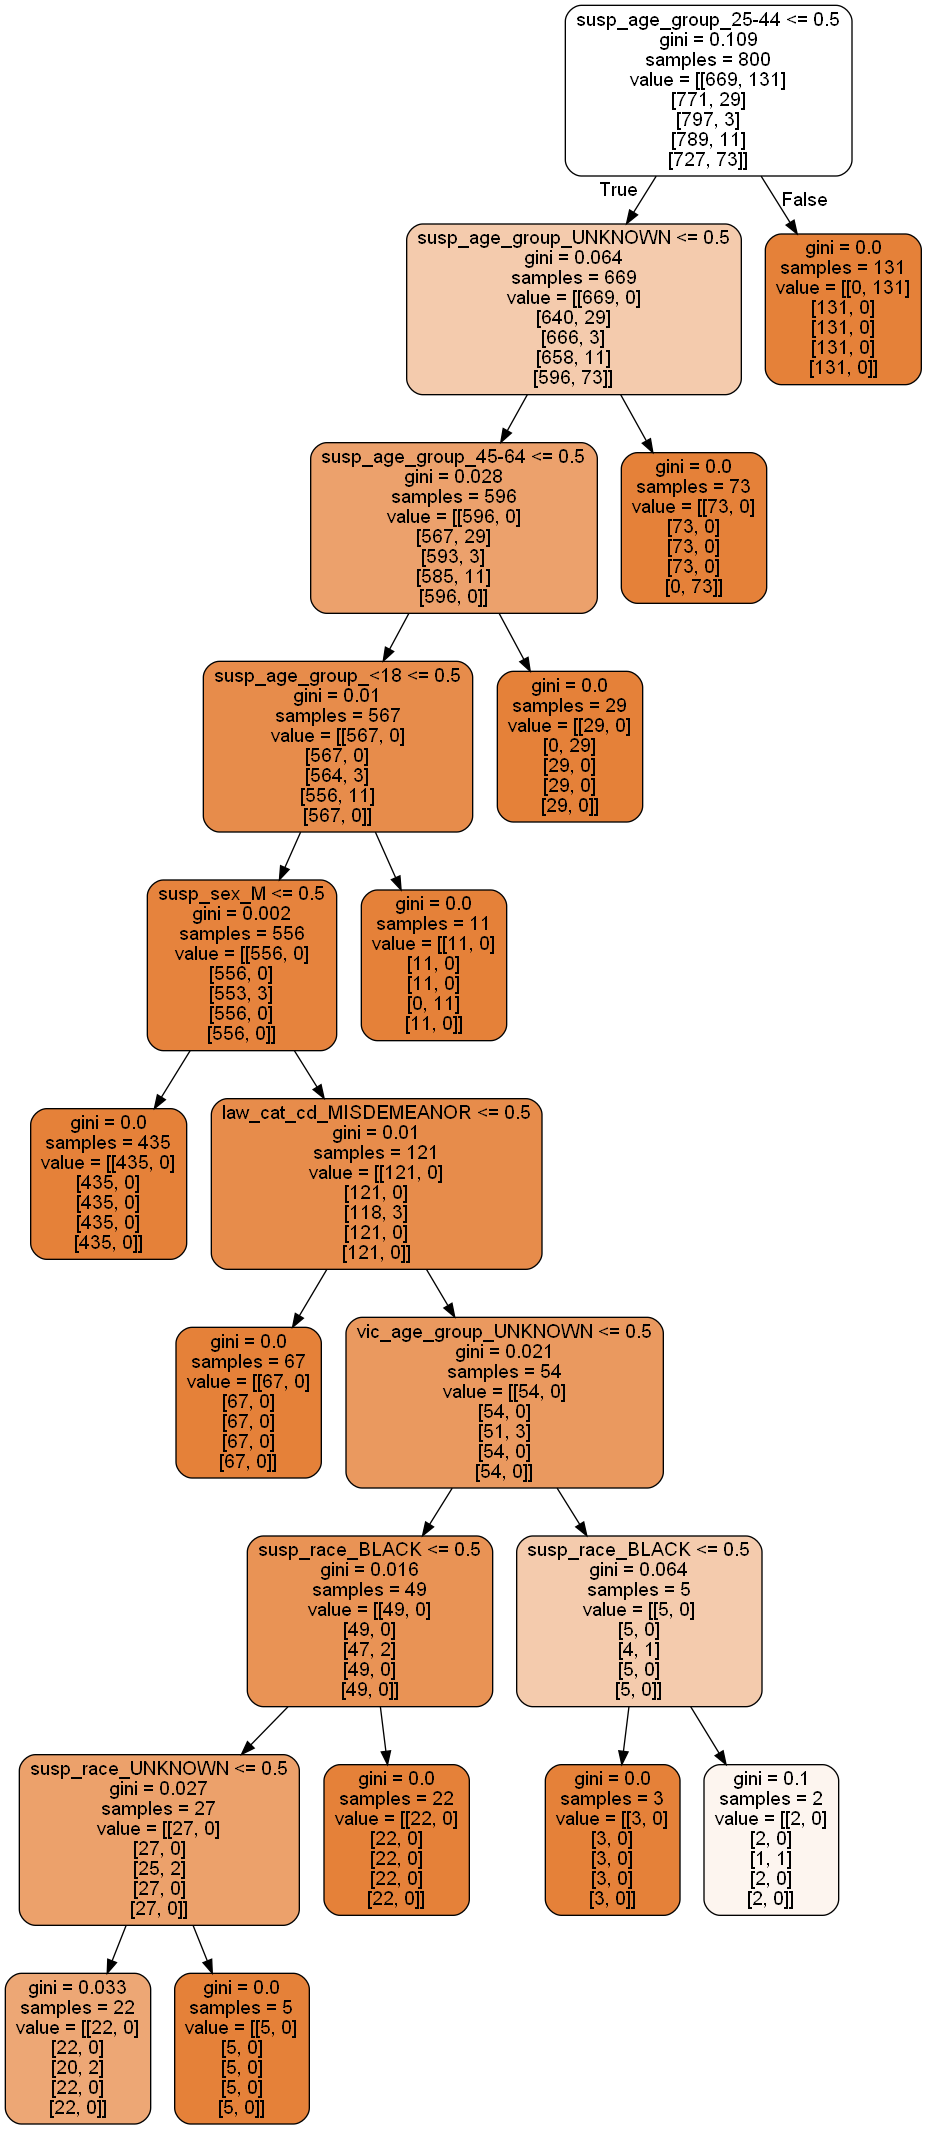

In [13]:
decision_tree = tree.DecisionTreeClassifier(random_state=0)
clf = decision_tree.fit(X_train_new, y_train)

dot_data = tree.export_graphviz(clf,
                              out_file="tree.dot",
                              feature_names = X_train_new.columns,
                              class_names = y_train,
                              rounded = True,
                              filled= True) 

graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
Image(graph.create_png())
graph.write_png("tree.png")
Image(filename='tree.png') 

Vemos como el caso de la edad de entre 25-44 años nos da los resultados mayores, seguido por los de edad desconocida y en tercer lugar de entre 45-64 años.

# Analisis a partir de imagenes

In [14]:
from jupyter_dash import JupyterDash

In [15]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

server = app.server

In [17]:
fig = px.scatter(df, x='cmplnt_to_dt', y='ofns_desc')

app.layout = html.Div(children=[
    html.H1(children='Cantidad de delitos por categoria y año'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Jun/2021 18:43:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:01] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:01] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1617985068.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:01] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1617985068.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:01] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:01] "GET /_dash-component-suites/dash_core_components/dash_core_components-shared.v1_16_0m1617985098.js HTTP/1.1" 200 -
1

Aquí podemos observar la cantidad de delitos a lo largo de los años, se observa que los más comunes obtenemos Asalto, Hurto grande/pequeño y Acoso.
Destacamos también que en este grafico podemos ver la cantidad de datos que tenemos en el conjunto, para el cual a partir de 2012 ahí una recopilación continua.


In [18]:
fig = px.scatter(df, x='cmplnt_to_dt', y='prem_typ_desc')

app.layout = html.Div(children=[
    html.H1(children='Lugares mas comunes del delito por año'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Jun/2021 18:43:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:35] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:35] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1617985068.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:35] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1617985068.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:35] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:35] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_3m1617985573.min.js HTTP/1.1" 200 -
127.0

Parecido al anterior, ahora vamos a ver donde ocurren la mayoría de estos delitos.

Se ve que los lugares mas comunes son la calle, las cadenas de tiendas y los distintos tipos de residencias de las personas.

Destacamos también como en el grafico anterior la tendencia de obtención de datos a partir de 2012.

In [19]:
fig = px.box(df, x="law_cat_cd", y="boro_nm")


app.layout = html.Div(children=[
    html.H1(children='Delitos mas comunes por zonas'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Jun/2021 18:43:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:42] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:42] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1617985068.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:42] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1617985068.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:42] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:42] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_3m1617985573.min.js HTTP/1.1" 200 -
127.0

Ahora analizaremos una variable la cual contiene 3 de los delitos más comunes.
Destacamos que la mayoría de estos delitos se cometen en el Bronx y donde menos ocurren es en Manhattan. 


In [20]:
fig = px.scatter(df, y="boro_nm", x="cmplnt_to_dt") 


app.layout = html.Div(children=[
    html.H1(children='Numero de delitos por zona y año'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Jun/2021 18:43:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:52] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:52] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1617985068.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:52] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1617985068.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:52] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:52] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_3m1617985573.min.js HTTP/1.1" 200 -
127.0

A continuación, observaremos en que zona se produce el mayor número de delitos.

Se observa por la densidad de puntos que en Brooklyn es donde mas delitos ocurren seguido muy de cerca de Queens. Donde menos delitos se comenten y con gran diferencia con los demás es en State Island. 


In [21]:
df['susp_race'] = df['susp_race'].replace({'UNKNOWN':np.nan}, regex=True)
df['susp_race'].dropna()

fig = px.box(df, x='boro_nm', y='susp_race')


# Definimos la estructura (layout) de la página web de salida ###################
app.layout = html.Div(children=[
    html.H1(children='Raza del sospechoso por zona'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Jun/2021 18:43:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:59] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:59] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1617985068.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:59] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1617985068.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:59] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1617985068.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2021 18:43:59] "GET /_dash-component-suites/dash_html_components/dash_html_components.v1_1_3m1617985573.min.js HTTP/1.1" 200 -
127.0

Ahora vemos un estudio de la raza del sospechoso por zonas donde ocurrieron los delitos.

Vemos claramente que la mayoría de los delitos los cometen personas negras e hispanos blancos. Destacamos en Brooklyn donde la mayoría de los delitos suceden que son cometidos por estas razas que comentamos en su mayoría, pero también tenemos datos de todas las demás.

En contraste, de indios americanos no tenemos datos ni en State island, Bronx o Queens.


In [ ]:
df['susp_sex'].dropna()

fig = px.box(df, x='boro_nm', y='susp_sex')


# Definimos la estructura (layout) de la página web de salida ###################
app.layout = html.Div(children=[
    html.H1(children='Sexo del sospechoso por zona'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Continuando con el estudio anterior veremos ahora que sexo predomina en lo que a los sospechosos se refiere.

Vemos que en la mayoría de las zonas son cometidos por hombres, con datos puntuales de mujeres y de sexo desconocido.

Destacamos en State Island donde hay un cuartil de datos de sospechosos femeninos y en Queens donde hay otro cuartil mucho mayor, pero en lo que se refiere al sexo desconocido del sospechoso.


In [23]:
df['susp_age_group'] = df['susp_age_group'].replace({'UNKNOWN':np.nan}, regex=True)
df['susp_age_group'].dropna()

df['vic_age_group'] = df['vic_age_group'].replace({'UNKNOWN':np.nan}, regex=True)
df['vic_age_group'].dropna()

fig = px.density_heatmap(df,  x='susp_age_group', y='vic_age_group',marginal_x="histogram", marginal_y="histogram")


app.layout = html.Div(children=[
    html.H1(children='Heatmap de edades de victimas y sospechosos'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


Por último, compararemos las edades de los sospechosos.

Para esto hemos elegido un heatmap donde aparte de comparar las edades de los sospechosos veremos también las edades de las victimas relacionadas con estos.

Vemos claramente como el rango de 25-44 años es donde se agrupan la mayoría de los sospechosos y la mayoría de 65 años es donde menores sospechosos hay.

Por otro lado, vemos que también el rango de 25-44 años es donde mayor numero de victimas se encuentran, coincidiendo con el de sospechosos. El rango menor también coincide con el de 65+ años, seguido muy de cerca por el de <18 años.


In [24]:
fig = px.density_heatmap(df,  x='susp_race', y='vic_race',marginal_x="histogram", marginal_y="histogram")


app.layout = html.Div(children=[
    html.H1(children='Heatmap de raza de victimas y sospechosos'),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


Para este grafico usaremos de nuevo un heatmap, en el cual compararemos la relación de las razas de tanto victimas como sospechosos a la hora de cometer un delito.

Se observa que donde mayor coincidencia de valores tenemos es entre personas negras como sospechosos y como víctimas.

Vemos una tendencia en cometer delitos entre personas de la misma raza como se puede ver un poco entre personas blancas y personas hispanas blancas.

Destacar que para una raza de victima desconocida tenemos que la mayoría de los sospechosos son de raza negra también. 

Como ultimo ver también que las personas de raza indio americano/nativo de alaska son las que menos casos de sospechosos tienen, por lo cual no tenemos ningún dato a destacar para ellos.

## Comparacion por zonas de la raza de la victima

<Figure size 864x720 with 0 Axes>

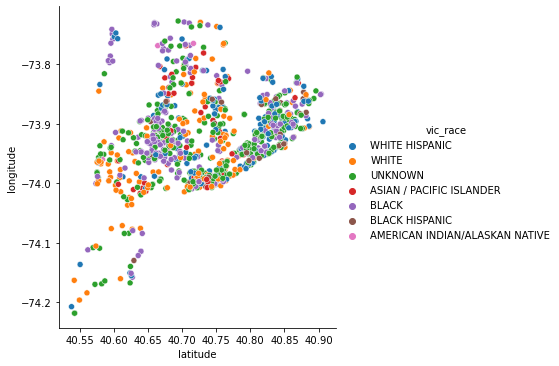

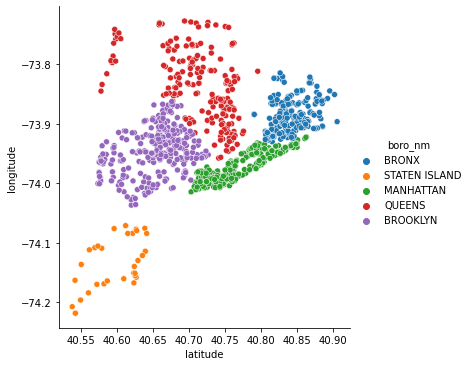

In [25]:
fig = plot.figure(figsize=(12, 10))

sns.relplot(x=df['latitude'], y=df['longitude'], hue=df['vic_race'], data=df)
sns.relplot(x=df['latitude'], y=df['longitude'], hue=df['boro_nm'], data=df)

Tenemos dos imágenes relacionadas en las cuales las coordenadas donde los hechos de las victimas ocurrieron son representados en el primer gráfico y en el segundo vemos las zonas correspondientes a esas coordenadas.

Vemos como hay una mayor cantidad de valores relacionados con las personas negras en Brooklyn y en Bronx vemos un gran numero de personas hispanas blancas.

En cuanto a las demás zonas vemos como están muy distribuidos estos datos, por lo cual no se puede hacer una deducción de alguna raza que destaque.


## Comparacion por zonas de la raza del sospechoso

<Figure size 864x720 with 0 Axes>

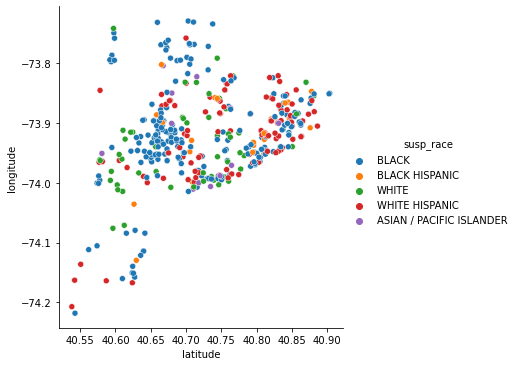

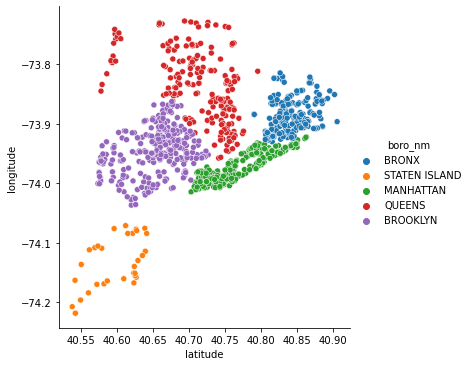

In [26]:
fig = plot.figure(figsize=(12, 10))

sns.relplot(x=df['latitude'], y=df['longitude'], hue=df['susp_race'], data=df)
sns.relplot(x=df['latitude'], y=df['longitude'], hue=df['boro_nm'], data=df)

Al igual que en el apartado anterior, exceptuando que ahora en el primer grafico tenemos la raza de los sospechosos.

Vemos claramente como las personas negras tienen mayor representación en Brooklyn, con una representación superior muy leve a las demás razas, pero sin poder llegar a destacarla como la mayor de esas zonas.

Destacamos que en State Island hay muy pocos sospechosos negros, donde destacamos a las personas blancas o hispanas blancas como la mayor cantidad de sospechosos.

Estos resultados son refutados por los obtenidos en los gráficos de cajas vistos al principio.


# Conclusion

En este trabajo hemos estado estudiando las distintas variables encontradas en el conjunto de datos.
Para nuestro caso hemos centrado el estudio en los datos correspondiente a las víctimas y los sospechosos, así como la zona donde se cometieron estos delitos.
Al principio hicimos un pequeño estudio de los delitos más comunes, aunque ya tenemos también en el conjunto de datos una variable específica para los 3 más comunes.

A partir de aquí hemos centrado el estudio en los datos correspondiente a los sospechosos, ya que nos ha parecido lo más interesante ya que así nos podemos hacer una idea del perfil de este por las distintas zonas.
Por lo estudiado hemos visto que la mayoría de los delitos son cometido por personas de raza negra, seguido por personas hispanas blancas, aunque la cantidad de estos es la mitad que la de los primeros. Destacamos también a las personas de raza indio americano/nativo de Alaska los cuales no cometen apenas delitos.
En cuanto a la raza de las victimas la mayoría son desconocidas, seguidas por personas negras y en igualdad de datos tenemos a los hispanos blancos y a los blancos.
Hay que destacar en el apartado de raza que la mayoría de los delitos son cometidos entre personas de la misma raza.

En cuanto al rango de edad la mayoría de sospechoso se encuentran entre los 25-44 años, se puede entender por lo grande del rango y porque estas personas se encuentran en un rango de edad en el cual pueden ser más propensas a realizar algún acto delictivo que una persona mayor o menor de edad.
En lo que respecta a las victimas tenemos otra vez el rango de edad de 25-44 años, destacamos otra vez lo grande de este intervalo y al estar en un rango igual al de sospechosos los hace más propensos a tener relación con ellos y por ende que sean víctimas de los delitos.
Por último, ver que las personas mayores de 65 años son las que menos delitos comenten o las que menor número de víctimas tienen, esto podemos relacionarlo al menor número de personas que se encuentran en ese rango de edad y por ende menor probabilidad de ser víctimas de delitos o delincuentes.

La última variable que analizar correspondiente a estos es la del sexo, en la cual tenemos que la mayoría de los sospechosos son hombre con diferencia. Y en lo que corresponde a victimas tenemos que las mujeres son un poco más propensas a ser víctimas que los hombres.


Pasando al análisis de la zona, vemos claramente que en Brooklyn, Bronx o Manhattan la mayoría de los sospechosos son de raza negra. En cambio, en State Island la mayoría de los sospechosos son blancos. En Queens hay una distribución más o menos pareja de la raza de los sospechosos.
